 ### Import Libraries

In [1]:
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets

from sklearn.metrics import accuracy_score              # To evaluate model performance
import pickle                   # For saving and loading models
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestClassifier    # For the random forest model
from sklearn.neighbors import KNeighborsClassifier # For the k-NN model
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.svm import SVC  # For support vector machine model
from sklearn.naive_bayes import GaussianNB  # For Naive Bayes model


 ### Load Data

In [2]:
# Load the data
path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'
data = pd.read_pickle(path)

pd.options.display.max_columns = None
print(data.columns)

# Convert all columns to int type
data = data.astype(int)

print(data.dtypes)


Index(['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'OverTime', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'Dept_Human Resources', 'Dept_Research & Development',
       'Dept_Sales', 'EduField_Human Resources', 'EduField_Life Sciences',
       'EduField_Marketing', 'EduField_Medical', 'EduField_Other',
       'EduField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative', 'Divorced',
       'Married', 'Single'],
      dtype='object')
Age                                  int32
Attrition                            int32
DistanceFromHome                     int32
EnvironmentSatisfaction              i

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_5620\4038283508.py:2: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'


In [3]:
# Split the data into features and target
X = data.drop('Attrition', axis=1) # Input variables
y = data['Attrition'] # Variable to predict

# Oversampling the minority class
print(Counter(y))
over = RandomOverSampler(random_state=42) # Create an instance of SMOTE
X, y = over.fit_resample(X, y)
print(Counter(y))


Counter({0: 3590, 1: 1069})
Counter({1: 3590, 0: 3590})


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Save the fitted scaler and column order
with open('D:\\BIM\\Summer Project\\project\\models\\encoders.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,             # Save the fitted StandardScaler
        'columns': X.columns.tolist() # Save column order
    }, f)


(5385, 33) (1795, 33) (5385,) (1795,)


In [5]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Instance of the model
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f'\nRandom Forest Model accuracy: {accuracy:.2f}\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# # Plot the confusion matrix
# cm = confusion_matrix(y_test, predictions)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()



Random Forest Model accuracy: 0.94

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       873
           1       0.93      0.95      0.94       922

    accuracy                           0.94      1795
   macro avg       0.94      0.94      0.94      1795
weighted avg       0.94      0.94      0.94      1795



In [6]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model's performance
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'\nLogistic Regression Model accuracy: {logistic_accuracy:.2f}\n')
print(classification_report(y_test, logistic_predictions))




Logistic Regression Model accuracy: 0.64

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       873
           1       0.66      0.62      0.64       922

    accuracy                           0.64      1795
   macro avg       0.64      0.64      0.64      1795
weighted avg       0.64      0.64      0.64      1795



In [7]:
# Train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)
# Evaluate the model's performance
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'\nK-Nearest Neighbors Model accuracy: {knn_accuracy:.2f}\n')
print(classification_report(y_test, knn_predictions))



K-Nearest Neighbors Model accuracy: 0.73

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       873
           1       0.72      0.76      0.74       922

    accuracy                           0.73      1795
   macro avg       0.73      0.73      0.73      1795
weighted avg       0.73      0.73      0.73      1795



In [8]:
# Train a support vector machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)
# Evaluate the model's performance
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'\nSupport Vector Machine Model accuracy: {svm_accuracy:.2f}\n')
print(classification_report(y_test, svm_predictions))



Support Vector Machine Model accuracy: 0.63

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       873
           1       0.65      0.59      0.62       922

    accuracy                           0.63      1795
   macro avg       0.63      0.63      0.63      1795
weighted avg       0.63      0.63      0.63      1795



In [9]:
# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Make predictions on the test set
nb_predictions = nb_model.predict(X_test)
# Evaluate the model's performance
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f'\nNaive Bayes Model accuracy: {nb_accuracy:.2f}\n')
print(classification_report(y_test, nb_predictions))



Naive Bayes Model accuracy: 0.62

              precision    recall  f1-score   support

           0       0.59      0.73      0.65       873
           1       0.67      0.52      0.59       922

    accuracy                           0.62      1795
   macro avg       0.63      0.62      0.62      1795
weighted avg       0.63      0.62      0.62      1795



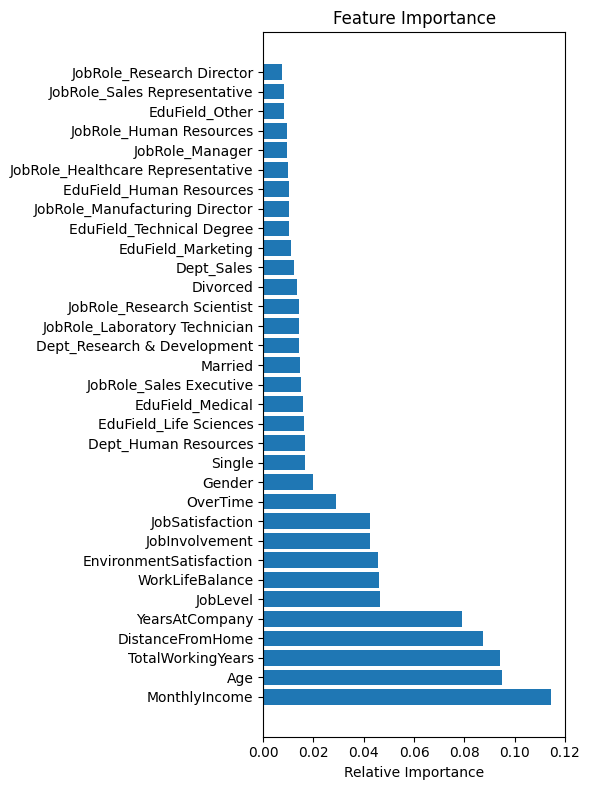

In [10]:
features = X.columns
importance = model.feature_importances_
indices =np.argsort(importance)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(6, 8))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), labels=names)
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [11]:
# Save the model
import pickle

model_path = 'D:\\BIM\\Summer Project\\project\\models\\random-forest-model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump((model, X.columns.tolist()), file)